# Import and preprocessing

In [1]:
# For data processing
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import os
from glob import glob
from tqdm import tqdm, tqdm_notebook

import gc
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, AutoModelWithLMHead
import torch
import time

In [3]:
import transformers
print(transformers.__version__)

4.37.0


In [4]:
df = pd.read_csv('PubMed/validation.csv')

In [5]:
news_article_list = df['article']
news_summary_list = df['abstract']
print(len(news_article_list), len(news_summary_list))

6633 6633


# Lexrank

In [9]:
import nltk
nltk.download('punkt')

from nltk.tokenize import sent_tokenize
from lexrank import STOPWORDS, LexRank


[nltk_data] Downloading package punkt to /home/chinois/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
sentences = sent_tokenize(news_article_list[0])
documents = []
for article in tqdm(news_article_list[:200]) :
    documents.append(sent_tokenize(article))
lxr = LexRank(documents)


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 614.24it/s]


In [14]:
lxr_summary = []
lxr_times = []
for article in tqdm(news_article_list[:200]):
    start = time.time()
    sentences = sent_tokenize(article)
    summary_sentences = lxr.get_summary(sentences, summary_size= 4,threshold=0.03)
    summary = ''.join(summary_sentences)
    lxr_summary.append(summary)
    end = time.time()
    lxr_times.append(end-start)
print(lxr_summary[0])
print(lxr_times[0])

100%|█████████████████████████████████████████| 200/200 [00:26<00:00,  7.52it/s]

venous thromboembolism ( vte ) comprising of deep vein thrombosis ( dvt ) and pulmonary embolism ( pe ) can result in significant mortality , morbidity , and healthcare expenditure .approximately , one - third of patients with symptomatic vte manifests pe , whereas two - thirds manifest dvt alone .of those diagnosed beyond 6 weeks 
 diagnosis of venous thromboembolism during the postoperative period ( n = 81 ) the most common ( 73% ) symptom was  swelling of the limb  among patients with vte [ table 6 ] 
 pe was confirmed by pulmonary angiography in 27% of all the patients [ table 7 ] .patients with a history of vte are about 8 times more likely to develop a new episode during a subsequent high - risk period compared with patients without a history of dvt or pe .
0.17928504943847656


In [17]:
# Specify the file name
file_name = 'lxr_summaries.pkl'

# Open the file in binary write mode
with open(file_name, 'wb') as file:
    # Use pickle.dump to save the list to the file
    pickle.dump(lxr_summary, file)

print(f'The list has been saved to {file_name}')

The list has been saved to lxr_summaries.pkl


In [18]:
# Specify the file name
file_name = 'lxr_times.pkl'

# Open the file in binary write mode
with open(file_name, 'wb') as file:
    # Use pickle.dump to save the list to the file
    pickle.dump(lxr_times, file)

print(f'The list has been saved to {file_name}')

The list has been saved to lxr_times.pkl


# GPT2


In [19]:
model = AutoModelWithLMHead.from_pretrained('gpt2')
tokenizer = AutoTokenizer.from_pretrained("gpt2")


In [21]:
GPT2_times = []
GPT2_summary = []
for article in tqdm(news_article_list[:200]):
    start = time.time()
    inputs = tokenizer.encode("summarize: " + article, return_tensors="pt", max_length=149)
    # add attention mask here
    
    outputs = model.generate(inputs, pad_token_id=tokenizer.eos_token_id, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    decoded_GPT2 = tokenizer.decode(outputs[0])
    GPT2_summary.append(decoded_GPT2)
    end = time.time()
    GPT2_times.append(end-start)
print(GPT2_summary[0], '\n', len(GPT2_summary))

100%|█████████████████████████████████████████| 200/200 [02:39<00:00,  1.25it/s]

summarize: venous thromboembolism ( vte ) comprising of deep vein thrombosis ( dvt ) and pulmonary embolism ( pe ) can result in significant mortality, morbidity, and healthcare expenditure. 
 approximately, one - third of patients with symptomatic vte manifests pe, whereas two - thirds manifest dvt alone. 
 both dvt and pe can be clinically silent ( asymptomatic ) and hence not suspected. 
 if undiagnosed, asymptomatic vte can lead to chronic venous disease or recurrent vte and long - term debilitating sequelae such as postthrombotic syndrome and chronic thromboembolic pulmonary hypertension. 

 
 200


In [22]:
# Specify the file name
file_name = 'GPT2_summaries.pkl'

# Open the file in binary write mode
with open(file_name, 'wb') as file:
    # Use pickle.dump to save the list to the file
    pickle.dump(GPT2_summary, file)

print(f'The list has been saved to {file_name}')


The list has been saved to GPT2_summaries.pkl


In [23]:
import pickle

# Specify the file name
file_name = 'GPT2_times.pkl'

# Open the file in binary write mode
with open(file_name, 'wb') as file:
    # Use pickle.dump to save the list to the file
    pickle.dump(GPT2_times, file)

print(f'The list has been saved to {file_name}')


The list has been saved to GPT2_times.pkl


# GPT3


In [24]:
model = AutoModelWithLMHead.from_pretrained('openai-gpt')
tokenizer = AutoTokenizer.from_pretrained("openai-gpt")

In [25]:
GPT3_times = []
GPT3_summary = []
for article in tqdm(news_article_list[:500]):
    start = time.time()
    inputs = tokenizer.encode("summarize: " + article, return_tensors="pt", max_length=149)
    # add attention mask here
    
    outputs = model.generate(inputs, pad_token_id=tokenizer.eos_token_id, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    decoded_GPT3 = tokenizer.decode(outputs[0])
    GPT3_summary.append(decoded_GPT3)
    end = time.time()
    GPT3_times.append(end-start)
print(GPT3_summary[0], '\n', len(GPT3_summary))

100%|█████████████████████████████████████████| 500/500 [07:49<00:00,  1.07it/s]

summarize : venous thromboembolism ( vte ) comprising of deep vein thrombosis ( dvt ) and pulmonary embolism ( pe ) can result in significant mortality, morbidity, and healthcare expenditure. approximately, one - third of patients with symptomatic vte manifests pe, whereas two - thirds manifest dvt alone. both dvt and pe can be clinically silent ( asymptomatic ) and hence not suspected. if undiagnosed, asymptomatic vte can lead to chronic venous disease or recurrent vte and long - term debilitating sequelae such as postthrombotic syndrome and chronic thromboembolic pulmonary hypertension 
 500


In [26]:
# Specify the file name
file_name = 'GPT3_summaries.pkl'

# Open the file in binary write mode
with open(file_name, 'wb') as file:
    # Use pickle.dump to save the list to the file
    pickle.dump(GPT3_summary, file)

print(f'The list has been saved to {file_name}')

The list has been saved to GPT3_summaries.pkl


In [27]:
# Specify the file name
file_name = 'GPT3_times.pkl'

# Open the file in binary write mode
with open(file_name, 'wb') as file:
    # Use pickle.dump to save the list to the file
    pickle.dump(GPT3_times, file)

print(f'The list has been saved to {file_name}')


The list has been saved to GPT3_times.pkl


# Analysis

In [6]:
import statistics

In [7]:
import pickle

def get_list(name):
    # Open the file in binary read mode
    with open(name, 'rb') as file:
        # Use pickle.load to load the list from the file
        my_list = pickle.load(file)

        # Now, 'my_list' contains the data loaded from the pickle file
    return my_list

lxr_summary, GPT2_summary, GPT3_summary = get_list('lxr_summaries.pkl'), get_list('GPT2_summaries.pkl'), get_list('GPT3_summaries.pkl')


In [8]:
from rouge import Rouge

# Calculate ROUGE scores for each pair of system and reference summaries
def calculate_rouge(system_summary, reference_summary):
    evaluator = Rouge()
    scores = evaluator.get_scores(system_summary, reference_summary)
    return scores

In [9]:
scores_lxr = {'rouge-1': {'r': [], 'p': [], 'f': []}, 'rouge-2': {'r': [], 'p': [], 'f': []}, 'rouge-l': {'r': [], 'p': [], 'f': []}}
scores_gpt2= {'rouge-1': {'r': [], 'p': [], 'f': []}, 'rouge-2': {'r': [], 'p': [], 'f': []}, 'rouge-l': {'r': [], 'p': [], 'f': []}}
scores_gpt3= {'rouge-1': {'r': [], 'p': [], 'f': []}, 'rouge-2': {'r': [], 'p': [], 'f': []}, 'rouge-l': {'r': [], 'p': [], 'f': []}}

for index, summary in tqdm(enumerate(news_summary_list[:200])):
    score_lxr = calculate_rouge(lxr_summary[index], summary)
    score_gpt2 = calculate_rouge(GPT2_summary[index], summary)
    score_gpt3 = calculate_rouge(GPT3_summary[index], summary)

    scores_lxr['rouge-1']['r'].append(score_lxr[0]['rouge-1']['r'])
    scores_lxr['rouge-1']['p'].append(score_lxr[0]['rouge-1']['p'])
    scores_lxr['rouge-1']['f'].append(score_lxr[0]['rouge-1']['f'])
    
    scores_lxr['rouge-2']['r'].append(score_lxr[0]['rouge-2']['r'])
    scores_lxr['rouge-2']['p'].append(score_lxr[0]['rouge-2']['p'])
    scores_lxr['rouge-2']['f'].append(score_lxr[0]['rouge-2']['f'])

    scores_lxr['rouge-l']['r'].append(score_lxr[0]['rouge-l']['r'])
    scores_lxr['rouge-l']['p'].append(score_lxr[0]['rouge-l']['p'])
    scores_lxr['rouge-l']['f'].append(score_lxr[0]['rouge-l']['f'])
    
    scores_gpt2['rouge-1']['r'].append(score_gpt2[0]['rouge-1']['r'])
    scores_gpt2['rouge-1']['p'].append(score_gpt2[0]['rouge-1']['p'])
    scores_gpt2['rouge-1']['f'].append(score_gpt2[0]['rouge-1']['f'])
    
    scores_gpt2['rouge-2']['r'].append(score_gpt2[0]['rouge-2']['r'])
    scores_gpt2['rouge-2']['p'].append(score_gpt2[0]['rouge-2']['p'])
    scores_gpt2['rouge-2']['f'].append(score_gpt2[0]['rouge-2']['f'])

    scores_gpt2['rouge-l']['r'].append(score_gpt2[0]['rouge-l']['r'])
    scores_gpt2['rouge-l']['p'].append(score_gpt2[0]['rouge-l']['p'])
    scores_gpt2['rouge-l']['f'].append(score_gpt2[0]['rouge-l']['f'])
    
    scores_gpt3['rouge-1']['r'].append(score_gpt3[0]['rouge-1']['r'])
    scores_gpt3['rouge-1']['p'].append(score_gpt3[0]['rouge-1']['p'])
    scores_gpt3['rouge-1']['f'].append(score_gpt3[0]['rouge-1']['f'])
    
    scores_gpt3['rouge-2']['r'].append(score_gpt3[0]['rouge-2']['r'])
    scores_gpt3['rouge-2']['p'].append(score_gpt3[0]['rouge-2']['p'])
    scores_gpt3['rouge-2']['f'].append(score_gpt3[0]['rouge-2']['f'])

    scores_gpt3['rouge-l']['r'].append(score_gpt3[0]['rouge-l']['r'])
    scores_gpt3['rouge-l']['p'].append(score_gpt3[0]['rouge-l']['p'])
    scores_gpt3['rouge-l']['f'].append(score_gpt3[0]['rouge-l']['f'])


    

200it [00:07, 25.01it/s]


In [10]:
mean_lxr = {'rouge-1': {'r': 0, 'p': 0, 'f': 0}, 'rouge-2': {'r': 0, 'p': 0, 'f': 0}, 'rouge-l': {'r': 0, 'p': 0, 'f': 0}}

mean_lxr['rouge-1']['r'] = statistics.mean(scores_lxr['rouge-1']['r'])
mean_lxr['rouge-1']['p'] = statistics.mean(scores_lxr['rouge-1']['p'])
mean_lxr['rouge-1']['f'] = statistics.mean(scores_lxr['rouge-1']['f'])

mean_lxr['rouge-2']['r'] = statistics.mean(scores_lxr['rouge-2']['r'])
mean_lxr['rouge-2']['p'] = statistics.mean(scores_lxr['rouge-2']['p'])
mean_lxr['rouge-2']['f'] = statistics.mean(scores_lxr['rouge-2']['f'])

mean_lxr['rouge-l']['r'] = statistics.mean(scores_lxr['rouge-l']['r'])
mean_lxr['rouge-l']['p'] = statistics.mean(scores_lxr['rouge-l']['p'])
mean_lxr['rouge-l']['f'] = statistics.mean(scores_lxr['rouge-l']['f'])

In [11]:
print(mean_lxr)

{'rouge-1': {'r': 0.35050325617946965, 'p': 0.4018565311046738, 'f': 0.355270357817134}, 'rouge-2': {'r': 0.1318958302956287, 'p': 0.15530458509841868, 'f': 0.13212302963014844}, 'rouge-l': {'r': 0.30753408414522365, 'p': 0.3551126868505506, 'f': 0.31258070228710805}}


In [12]:
mean_gpt2 = {'rouge-1': {'r': 0, 'p': 0, 'f': 0}, 'rouge-2': {'r': 0, 'p': 0, 'f': 0}, 'rouge-l': {'r': 0, 'p': 0, 'f': 0}}

mean_gpt2['rouge-1']['r'] = statistics.mean(scores_gpt2['rouge-1']['r'])
mean_gpt2['rouge-1']['p'] = statistics.mean(scores_gpt2['rouge-1']['p'])
mean_gpt2['rouge-1']['f'] = statistics.mean(scores_gpt2['rouge-1']['f'])

mean_gpt2['rouge-2']['r'] = statistics.mean(scores_gpt2['rouge-2']['r'])
mean_gpt2['rouge-2']['p'] = statistics.mean(scores_gpt2['rouge-2']['p'])
mean_gpt2['rouge-2']['f'] = statistics.mean(scores_gpt2['rouge-2']['f'])

mean_gpt2['rouge-l']['r'] = statistics.mean(scores_gpt2['rouge-l']['r'])
mean_gpt2['rouge-l']['p'] = statistics.mean(scores_gpt2['rouge-l']['p'])
mean_gpt2['rouge-l']['f'] = statistics.mean(scores_gpt2['rouge-l']['f'])

In [13]:
print(mean_gpt2)

{'rouge-1': {'r': 0.2633249354772118, 'p': 0.34127232316167866, 'f': 0.2876986122251828}, 'rouge-2': {'r': 0.0891717227690447, 'p': 0.12780070858096076, 'f': 0.10049879000350255}, 'rouge-l': {'r': 0.23880439768933856, 'p': 0.3104499821969277, 'f': 0.26132438485658355}}


In [14]:
mean_gpt3 = {'rouge-1': {'r': 0, 'p': 0, 'f': 0}, 'rouge-2': {'r': 0, 'p': 0, 'f': 0}, 'rouge-l': {'r': 0, 'p': 0, 'f': 0}}

mean_gpt3['rouge-1']['r'] = statistics.mean(scores_gpt3['rouge-1']['r'])
mean_gpt3['rouge-1']['p'] = statistics.mean(scores_gpt3['rouge-1']['p'])
mean_gpt3['rouge-1']['f'] = statistics.mean(scores_gpt3['rouge-1']['f'])

mean_gpt3['rouge-2']['r'] = statistics.mean(scores_gpt3['rouge-2']['r'])
mean_gpt3['rouge-2']['p'] = statistics.mean(scores_gpt3['rouge-2']['p'])
mean_gpt2['rouge-2']['f'] = statistics.mean(scores_gpt3['rouge-2']['f'])

mean_gpt3['rouge-l']['r'] = statistics.mean(scores_gpt3['rouge-l']['r'])
mean_gpt3['rouge-l']['p'] = statistics.mean(scores_gpt3['rouge-l']['p'])
mean_gpt3['rouge-l']['f'] = statistics.mean(scores_gpt3['rouge-l']['f'])

In [15]:
print(mean_gpt3)

{'rouge-1': {'r': 0.2641683357057878, 'p': 0.33274536088609497, 'f': 0.2847899219275952}, 'rouge-2': {'r': 0.08791174392199019, 'p': 0.1214134715796845, 'f': 0}, 'rouge-l': {'r': 0.23926692466221966, 'p': 0.3019736690741397, 'f': 0.2581903368551379}}


In [16]:
# Create a DataFrame from the dictionaries
df = pd.DataFrame([mean_lxr['rouge-1'], mean_gpt2['rouge-1'], mean_gpt3['rouge-1']])

# Display the DataFrame
print(df)


          r         p         f
0  0.350503  0.401857  0.355270
1  0.263325  0.341272  0.287699
2  0.264168  0.332745  0.284790


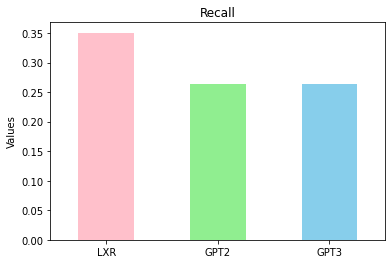

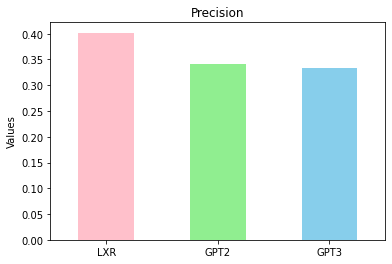

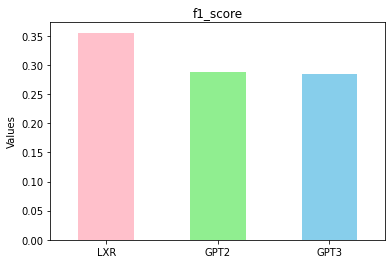

In [17]:
df['dictionary'] = ['LXR', 'GPT2', 'GPT3']
# Melt the DataFrame to reshape it for plotting
df_melted = pd.melt(df, id_vars=['dictionary'], value_vars=df.columns[:-1], var_name='key', value_name='value')
k = {'r':'Recall', 'p':'Precision', 'f':'f1_score'}

# Iterate through unique keys and plot for each key
for key in df_melted['key'].unique():
    key_df = df_melted[df_melted['key'] == key]
    
    title = k[key]
    key_df.plot(kind='bar', x='dictionary', y='value', rot=0, legend=False, color=['pink', 'lightgreen', 'skyblue'])
    # Set labels and title
    plt.xlabel('')
    plt.ylabel('Values')
    plt.title(f'{title}')
    
    # Display the plot
    plt.show()


In [18]:
gpt3_tot, gpt2_tot, lxr_tot = {}, {}, {}
gpt3_tot['r'] = (mean_gpt3['rouge-1']['r']+mean_gpt3['rouge-2']['r']+mean_gpt3['rouge-l']['r'])/3
gpt3_tot['p'] = (mean_gpt3['rouge-1']['p']+mean_gpt3['rouge-2']['p']+mean_gpt3['rouge-l']['p'])/3
gpt3_tot['f'] = (mean_gpt3['rouge-1']['f']+mean_gpt3['rouge-2']['f']+mean_gpt3['rouge-l']['f'])/3

gpt2_tot['r'] = (mean_gpt2['rouge-1']['r']+mean_gpt2['rouge-2']['r']+mean_gpt2['rouge-l']['r'])/3
gpt2_tot['p'] = (mean_gpt2['rouge-1']['p']+mean_gpt2['rouge-2']['p']+mean_gpt2['rouge-l']['p'])/3
gpt2_tot['f'] = (mean_gpt2['rouge-1']['f']+mean_gpt2['rouge-2']['f']+mean_gpt2['rouge-l']['f'])/3

lxr_tot['r'] = (mean_lxr['rouge-1']['r']+mean_lxr['rouge-2']['r']+mean_lxr['rouge-l']['r'])/3
lxr_tot['p'] = (mean_lxr['rouge-1']['p']+mean_lxr['rouge-2']['p']+mean_lxr['rouge-l']['p'])/3
lxr_tot['f'] = (mean_lxr['rouge-1']['f']+mean_lxr['rouge-2']['f']+mean_lxr['rouge-l']['f'])/3

In [29]:
# Create a DataFrame from the dictionaries
df = pd.DataFrame([lxr_tot, gpt2_tot, gpt3_tot])

# Display the DataFrame
print(df)

          r         p         f
0  0.263311  0.304091  0.266658
1  0.197100  0.259841  0.215440
2  0.197116  0.252044  0.180993


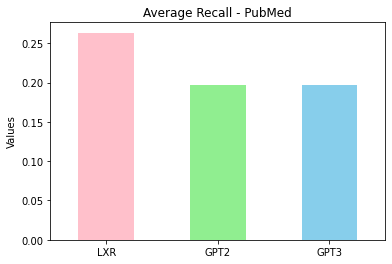

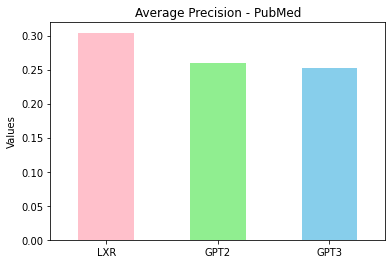

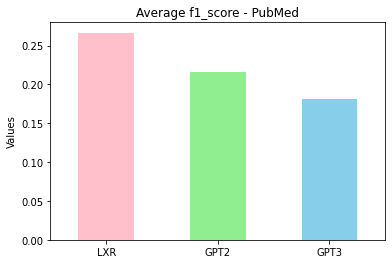

In [30]:
df['dictionary'] = ['LXR', 'GPT2', 'GPT3']
# Melt the DataFrame to reshape it for plotting
df_melted = pd.melt(df, id_vars=['dictionary'], value_vars=df.columns[:-1], var_name='key', value_name='value')
k = {'r':'Average Recall - PubMed', 'p':'Average Precision - PubMed', 'f':'Average f1_score - PubMed'}

# Iterate through unique keys and plot for each key
for key in df_melted['key'].unique():
    key_df = df_melted[df_melted['key'] == key]
    
    title = k[key]
    key_df.plot(kind='bar', x='dictionary', y='value', rot=0, legend=False, color=['pink', 'lightgreen', 'skyblue'])
    # Set labels and title
    plt.xlabel('')
    plt.ylabel('Values')
    plt.title(f'{title}')
    
    # Display the plot
    plt.show()


In [21]:
def variance_dict(diction):
    var_dict = {'rouge-1': {'r': 0, 'p': 0, 'f': 0}, 'rouge-2': {'r': 0, 'p': 0, 'f': 0}, 'rouge-l': {'r': 0, 'p': 0, 'f': 0}}

    var_dict['rouge-1']['r'] = statistics.variance(diction['rouge-1']['r'])
    var_dict['rouge-1']['p'] = statistics.variance(diction['rouge-1']['p'])
    var_dict['rouge-1']['f'] = statistics.variance(diction['rouge-1']['f'])

    var_dict['rouge-2']['r'] = statistics.variance(diction['rouge-2']['r'])
    var_dict['rouge-2']['p'] = statistics.variance(diction['rouge-2']['p'])
    var_dict['rouge-2']['f'] = statistics.variance(diction['rouge-2']['f'])

    var_dict['rouge-l']['r'] = statistics.variance(diction['rouge-l']['r'])
    var_dict['rouge-l']['p'] = statistics.variance(diction['rouge-l']['p'])
    var_dict['rouge-l']['f'] = statistics.variance(diction['rouge-l']['f'])
    
    return var_dict

In [22]:
var_lxr, var_gpt2, var_gpt3 = variance_dict(scores_lxr), variance_dict(scores_gpt2), variance_dict(scores_gpt3)

print(var_lxr, '\n\n\n', var_gpt2, '\n\n\n', var_gpt3)

{'rouge-1': {'r': 0.013432198315967443, 'p': 0.01860612870149935, 'f': 0.007043450146592574}, 'rouge-2': {'r': 0.008420184924796901, 'p': 0.011150852910399432, 'f': 0.0062244183588995835}, 'rouge-l': {'r': 0.01177653527502745, 'p': 0.01818042288882094, 'f': 0.007236711997795959}} 


 {'rouge-1': {'r': 0.015884955324350795, 'p': 0.017711299627489005, 'f': 0.013623453865326542}, 'rouge-2': {'r': 0.012057994717535013, 'p': 0.020211204190746103, 'f': 0.013910824330705339}, 'rouge-l': {'r': 0.014829258692085097, 'p': 0.018222958937947235, 'f': 0.013665994210708852}} 


 {'rouge-1': {'r': 0.01539713262782944, 'p': 0.015651476865538846, 'f': 0.012478368993244936}, 'rouge-2': {'r': 0.011888058059016566, 'p': 0.017538570742056257, 'f': 0.012799722780994538}, 'rouge-l': {'r': 0.014493985719165362, 'p': 0.016031603167454403, 'f': 0.012568741357037273}}


In [23]:
def variance_rouge(diction):
    var_rouge = {'r': 0, 'p': 0, 'f': 0}
    
    var_rouge['r'] = (diction['rouge-1']['r']+diction['rouge-2']['r']+diction['rouge-l']['r'])/3
    var_rouge['p'] = (diction['rouge-1']['p']+diction['rouge-2']['p']+diction['rouge-l']['p'])/3
    var_rouge['f'] = (diction['rouge-1']['f']+diction['rouge-2']['f']+diction['rouge-l']['f'])/3
    return var_rouge

In [24]:
varmean_lxr, varmean_gpt2, varmean_gpt3 = variance_rouge(var_lxr), variance_rouge(var_gpt2), variance_rouge(var_gpt3)

print(varmean_lxr, varmean_gpt2, varmean_gpt3)

{'r': 0.01120963950526393, 'p': 0.01597913483357324, 'f': 0.0068348601677627055} {'r': 0.014257402911323635, 'p': 0.018715154252060783, 'f': 0.013733424135580244} {'r': 0.013926392135337121, 'p': 0.0164072169250165, 'f': 0.012615611043758917}


In [25]:
# Create a DataFrame from the dictionaries
df = pd.DataFrame([varmean_lxr, varmean_gpt2, varmean_gpt3])

# Display the DataFrame
print(df)

          r         p         f
0  0.011210  0.015979  0.006835
1  0.014257  0.018715  0.013733
2  0.013926  0.016407  0.012616


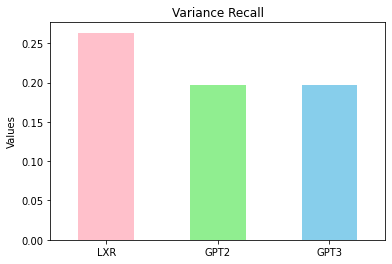

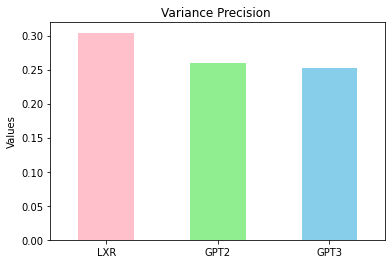

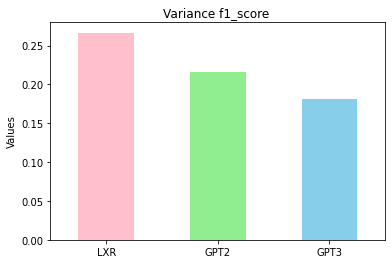

In [31]:
df['dictionary'] = ['LXR', 'GPT2', 'GPT3']
# Melt the DataFrame to reshape it for plotting
df_melted = pd.melt(df, id_vars=['dictionary'], value_vars=df.columns[:-1], var_name='key', value_name='value')
k = {'r':'Variance Recall', 'p':'Variance Precision ', 'f':'Variance f1_score '}

# Iterate through unique keys and plot for each key
for key in df_melted['key'].unique():
    key_df = df_melted[df_melted['key'] == key]
    
    title = k[key]
    key_df.plot(kind='bar', x='dictionary', y='value', rot=0, legend=False, color=['pink', 'lightgreen', 'skyblue'])
    # Set labels and title
    plt.xlabel('')
    plt.ylabel('Values')
    plt.title(f'{title}')
    
    # Display the plot
    plt.show()
